# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from tasks.default_task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 0., 0., 0., 0.])   # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

In [3]:
# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

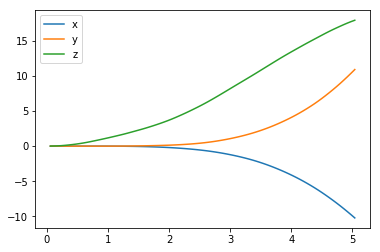

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

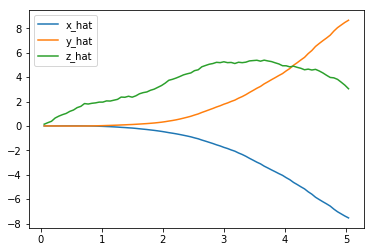

In [5]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

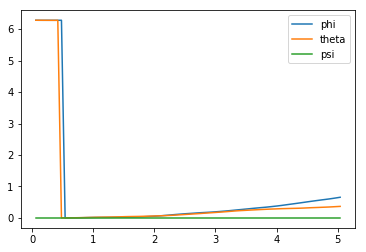

In [6]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

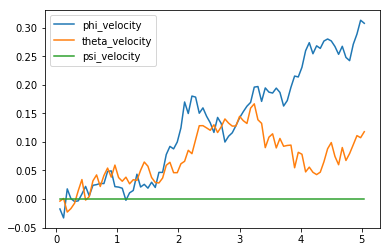

In [7]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

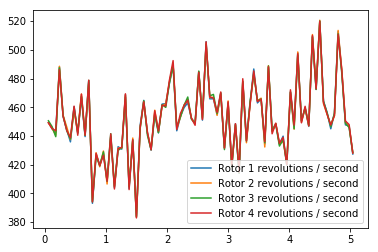

In [8]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [9]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-10.20490618  10.88290436  17.8918111    0.65645616   0.36657313
   0.        ]
[-7.53879864  8.66219841  3.04677666]
[0.30766524 0.1179023  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [10]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from tasks.default_task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                  i_episode, 
                  agent.score, 
                  agent.best_score, 
                  agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -0.516 (best =  -0.126), noise_scale = 3.25

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [11]:
## TODO: Train your agent here.
import numpy as np
import sys
# from agents.agent import DDPG
from agents.test_agent import Agent
# from tasks.takeoff import Task
from tasks.test_task import Task

num_episodes = 500

runtime = 10.0                                   # time limit of the episode
init_pos = np.array([0., 0., 0., 0., 0., 0.])    # initial pose
target_pos = np.array([0., 0., 100.])            # Takeoff. z axis --> 100.0

task = Task(init_pose=init_pos, 
            target_pos=target_pos, 
            runtime=runtime)

agent = Agent(task)
# agent = Agent(task)
rewards = []

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    step = 0
    while True:
        step +=1
        action = agent.act(state)
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        if done:
            x, y, z = task.sim.pose[:3]
            rewards.append(agent.score)
            print("\r\nEp={:4d}, score={:7.3f} (best={:7.3f}) pos={} {} {}".format(
                i_episode, agent.score, agent.best_score,
                round(x,2), round(y,2), round(z,2)), end="")  # [debug]
            break
    sys.stdout.flush()

Using TensorFlow backend.



Ep=   1, score=899.856 (best=899.856) pos=-0.1 -0.03 0.0
Ep=   2, score=539.852 (best=899.856) pos=-0.02 -0.03 0.0
Ep=   3, score=539.852 (best=899.856) pos=-0.02 -0.03 0.0
Ep=   4, score=899.856 (best=899.856) pos=-0.1 -0.03 0.0
Ep=   5, score=2160.700 (best=2160.700) pos=-0.1 0.6 0.0
Ep=   6, score=2160.700 (best=2160.700) pos=-0.1 0.6 0.0
Ep=   7, score=539.852 (best=2160.700) pos=-0.02 -0.03 0.0
Ep=   8, score=539.860 (best=2160.700) pos=-0.05 -0.01 0.0
Ep=   9, score=539.860 (best=2160.700) pos=-0.05 -0.01 0.0
Ep=  10, score=2160.699 (best=2160.700) pos=-0.1 0.6 0.0
Ep=  11, score=539.860 (best=2160.700) pos=-0.05 -0.01 0.0
Ep=  12, score=899.837 (best=2160.700) pos=-0.04 -0.07 0.0
Ep=  13, score=719.828 (best=2160.700) pos=0.01 -0.08 0.0
Ep=  14, score=719.875 (best=2160.700) pos=-0.1 0.11 0.0
Ep=  15, score=719.834 (best=2160.700) pos=-0.16 0.09 0.0
Ep=  16, score=539.875 (best=2160.700) pos=-0.07 0.04 0.0
Ep=  17, score=539.879 (best=2160.700) pos=-0.05 0.05 0.0
Ep=  18, score

Ep= 134, score=71500.438 (best=71602.882) pos=-0.42 -2.62 268.33
Ep= 135, score=71501.456 (best=71602.882) pos=0.83 3.12 268.32
Ep= 136, score=71499.900 (best=71602.882) pos=-0.33 1.43 268.35
Ep= 137, score=71499.472 (best=71602.882) pos=-0.36 1.54 268.34
Ep= 138, score=71500.781 (best=71602.882) pos=1.21 -2.88 268.32
Ep= 139, score=71499.182 (best=71602.882) pos=-0.2 -0.83 268.35
Ep= 140, score=71499.659 (best=71602.882) pos=1.13 1.12 268.34
Ep= 141, score=71500.564 (best=71602.882) pos=-2.02 0.48 268.34
Ep= 142, score=71500.638 (best=71602.882) pos=0.47 -3.07 268.32
Ep= 143, score=71501.074 (best=71602.882) pos=1.27 2.8 268.32
Ep= 144, score=71501.281 (best=71602.882) pos=3.44 -0.74 268.31
Ep= 145, score=71501.736 (best=71602.882) pos=-1.89 2.42 268.32
Ep= 146, score=71499.845 (best=71602.882) pos=-1.26 -1.46 268.34
Ep= 147, score=71498.959 (best=71602.882) pos=0.07 -0.09 268.35
Ep= 148, score=71501.750 (best=71602.882) pos=-2.23 -2.64 268.31
Ep= 149, score=71499.980 (best=71602.882)

Ep= 262, score=71500.483 (best=71602.882) pos=2.87 -0.6 268.32
Ep= 263, score=71501.604 (best=71602.882) pos=2.1 -3.12 268.3
Ep= 264, score=71499.402 (best=71602.882) pos=0.58 0.42 268.35
Ep= 265, score=71499.436 (best=71602.882) pos=0.2 0.83 268.35
Ep= 266, score=71499.639 (best=71602.882) pos=-1.3 0.13 268.35
Ep= 267, score=71500.301 (best=71602.882) pos=-0.51 1.58 268.34
Ep= 268, score=71499.018 (best=71602.882) pos=0.26 -1.29 268.34
Ep= 269, score=71501.027 (best=71602.882) pos=-1.33 2.06 268.33
Ep= 270, score=71499.376 (best=71602.882) pos=-0.01 0.97 268.35
Ep= 271, score=71498.974 (best=71602.882) pos=1.31 -0.6 268.34
Ep= 272, score=71499.018 (best=71602.882) pos=-0.47 -0.35 268.35
Ep= 273, score=71499.671 (best=71602.882) pos=1.72 0.5 268.34
Ep= 274, score=70507.640 (best=71602.882) pos=-0.94 -6.14 268.24
Ep= 275, score=71498.867 (best=71602.882) pos=-0.04 -0.62 268.35
Ep= 276, score=71500.740 (best=71602.882) pos=-1.35 1.96 268.34
Ep= 277, score=71501.167 (best=71602.882) pos=0

Ep= 390, score=71499.990 (best=71602.882) pos=2.29 -0.84 268.33
Ep= 391, score=71500.606 (best=71602.882) pos=-0.44 -2.64 268.33
Ep= 392, score=71499.259 (best=71602.882) pos=0.6 0.62 268.35
Ep= 393, score=71500.391 (best=71602.882) pos=-1.47 1.06 268.34
Ep= 394, score=71500.280 (best=71602.882) pos=0.4 2.2 268.34
Ep= 395, score=71499.997 (best=71602.882) pos=1.68 0.99 268.34
Ep= 396, score=71500.961 (best=71602.882) pos=2.32 1.79 268.33
Ep= 397, score=71502.601 (best=71602.882) pos=-2.93 2.25 268.31
Ep= 398, score=71499.271 (best=71602.882) pos=-0.27 -1.03 268.35
Ep= 399, score=71499.875 (best=71602.882) pos=2.27 -0.59 268.33
Ep= 400, score=71499.393 (best=71602.882) pos=0.66 -1.71 268.34
Ep= 401, score=71500.540 (best=71602.882) pos=-0.47 1.92 268.34
Ep= 402, score=71499.618 (best=71602.882) pos=1.03 -2.1 268.34
Ep= 403, score=71503.481 (best=71602.882) pos=2.25 3.88 268.29
Ep= 404, score=71499.214 (best=71602.882) pos=0.65 -1.5 268.34
Ep= 405, score=71501.316 (best=71602.882) pos=-0

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

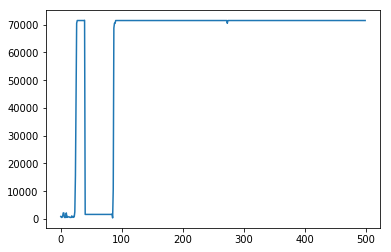

In [12]:
plt.plot(rewards, label='rewards')

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

I tried the easiest task: start from a zero position on all axis, and go to a higher position on z axis, while the other axis stay fixed. Also known as take off. As simple as it seams, I can assure you it is a nightmare to make it converge. After writing lots of lines of code (no real value here) and searching for similar approaches (some value), I came to discover that designing the right reward function just did the magic (at least I think so, it could be wrong). I made it a normalized squared difference between real time position and target position (takeoff one, x=0, y=0, z=‘something_above_the_ground’), absolute difference times some constant, negative rewards to get it done quickly, positive rewards to accumulate the maximum reward but with a large step reward at the exact position, used velocity as a discount multiplier for distance reward, based on the euclidian distance between two points (zero and target position), considered only 'z' axis… and so on. At the end, I’ve change the approach, using, instead, a constant reward for every ‘on air’ step, lots of penalties based on linear distance for each axis (first I’ve tried 3D distance), angles (different from zero), velocity (when very close to target position) and a constant to get it all multiplied by. My next attempt will be to segment the reward in a way that only z axis will matter first, after get it correctly done, I’ll make it for the other axis, then velocities. Can’t do that right now as deadline is arriving. I also would like to implement that with sklearn grid search, for testing various configurations. 

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

I did some research on the field. My very first reading was the original paper, as suggested (from 2015) about continuous control using deep deterministic policy gradients (DDPG), from Deepmind team. Reading this and other papers, I understood why to use such approach for a continuous action space (the real deal).  I did not try other algorithms, but I’ve got all DQN improvements applied on a DPG, with artificial neural networks as “approximators" (actor/critic).  

I tried lots of different configurations for my neural nets layers and did get almost nothing from using more complex ones. I have also tried batch normalization and regularisers, with no success. So I did not change the suggested values, activation functions and optimizers:

Actor:

- states = Input(shape=(self.state_size,), name='states')
- h0 = Dense(units=32, activation='relu')(states)
- h1 = Dense(units=64, activation='relu')(h0)
- h2 = Dense(units=32, activation='relu')(h1)
- raw_actions = Dense(units=self.action_size, activation=‘sigmoid', name=‘raw_actions')(h2)
- actions = Lambda(lambda x: (x * self.action_range) + self.action_low, name='actions')(raw_actions)


Critic:

- states = Input(shape=(self.state_size,), name='states')
- h0_states = Dense(units=32, activation='relu')(states)
- h1_states = Dense(units=64, activation='relu')(h0_states)

- actions = Input(shape=(self.action_size,), name='actions')
- h0_actions = Dense(units=32, activation='relu')(actions)
- h1_actions = Dense(units=64, activation='relu')(h0_actions)

- model = Add()([h1_states, h1_actions])
- model = Activation('relu')(model)
- Q_values = Dense(units=1, name='q_values')(model)

I’ve tried various hyperparameters ( sigma, θ, gamma, tau) combination. But it did not added much value for my results. Anyway, I ended up with that:

- theta = 0.125
- sigma = 0.0009
- gamma = 0.998
- tau = 0.099 



**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

As I wrote above, my background is getting better with every challenge on this field. I’ve spent three weeks just reading and re-creating lots of implementations for others physics simulations with similar continuous action-space scenarios (all from openAI gym). But even for the simpler task, the takeoff one,  I had some deep work to handle. The agent seems to learn to hoover after some altitude, but it keeps there and have a difficult time getting to a lower altitude. To change that, I’ve tried to penalize the distance from target after some point, but I guess I have to use it to implement a negative velocity. On moving horizontally, the agent presented no problems, as it behaves as expected, not moving on axis x and y.   

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: 

I did learn a lot. It was inspiring to have my brain running straight to an empty space of ideas.
Getting start was really challenging. I did not have a good background on artificial neural nets or any frameworks, like keras and pytorch, so I’ve stoped everything and went to study on this topics. After sometime I could, at least, understand what was happening on my actor-critic model. The real work though, was not implementing hidden layers (sizes, activation functions), batch normalization, replay buffer, soft update… but how to specify a solid reward that would work (I still insecure about it). After a large amount of attempts, I still not getting why the z axis suddenly drops to zero even though the agent already learned the rewards on higher values. 

I would appreciate a step by step best solution to this project using pytorch. That’s what I’m studying / trying right now.  

## Test Learned Agent

In [13]:
runtime = 10.                                    # time limit of the episode
init_pose = np.array([0., 0., 0., 0., 0., 0.])   # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']

results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    state = agent.reset_episode() # start a new episode
    while True:
        rotor_speeds = agent.act(state)
        next_state, reward, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        state = next_state
        if done:
            break

## Position

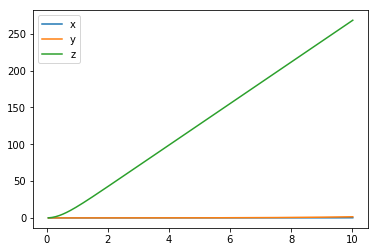

In [14]:
plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

## Velocity

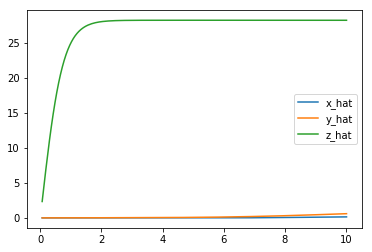

In [15]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

## Euler angles (the rotation over the $x$-, $y$-, and $z$-axes)

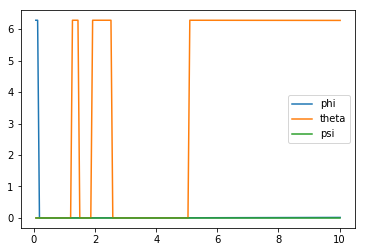

In [16]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

##  Velocities (in radians per second) 

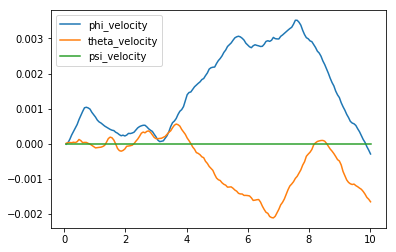

In [17]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

## Agent's choice of actions

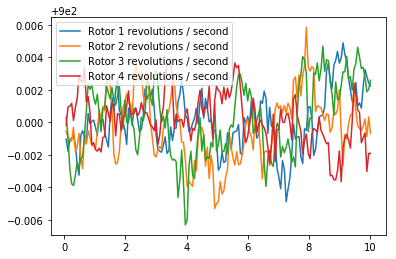

In [18]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()